# Sales Performance Analysis and Business Insights.
## Project Plan 
##### PACE
I will be following the PACE workflow being the Planning, Analyzing, Constructing and Evaluation to complete the project and answer business questions. 

Data Used; SuperStore Sales Dataset(Kaggle.com)
### 1.Plan Stage
#### Goal 
The main goal of this project is to understand what drives sales and profit in the Superstore dataset and to uncover patterns that can help improve business decisions. I want to clean the data in Python, explore the relationships in the dataset using statistical techniques, and then build a dashboard in Power BI that visually explains my findings.I will be using the PACE workflow that i learned from coursera online learning as i find it easier to follow. 

#### Business Questions
1. What are the key sales and profit KPIs?
2. Do regions/categories differ significantly in sales or profit? (Hypothesis tests & ANOVA)
3. What factors predict profit? (Regression)
4. Is discount affecting profit? (Correlation + regression)

### 2.Analyze Stage

In [1]:
#importing the libraries that i will be working with. 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [2]:
#Loading the data. 
df = pd.read_csv("C:/Users/admin/Desktop/Projects/Sales/SuperStoreOrders.csv")

### Checking the dataframe. 

In [3]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,5/1/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [4]:
df.shape

(51290, 21)

In [5]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
df.dtypes

order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_name      object
segment            object
state              object
country            object
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales              object
quantity            int64
discount          float64
profit            float64
shipping_cost     float64
order_priority     object
year                int64
dtype: object

In [7]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [8]:
df.describe(include='all')

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000
unique,25035,1430,1464,4,795,3,1094,147,7,13,...,3,17,3788,2246,NaN,NaN,NaN,NaN,4,NaN
top,CA-2014-100111,18-06-2014,22-11-2014,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,...,Office Supplies,Binders,Staples,13,NaN,NaN,NaN,NaN,Medium,NaN
freq,14,135,130,30775,108,26518,2001,9994,11002,11117,...,31273,6152,227,589,NaN,NaN,NaN,NaN,29433,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.476545,0.142908,28.641740,26.375915,NaN,2012.777208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.278766,0.212280,174.424113,57.296804,NaN,1.098931
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,0.000000,-6599.978000,0.000000,NaN,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.000000,0.000000,9.240000,7.790000,NaN,2013.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.000000,0.200000,36.810000,24.450000,NaN,2014.000000


### Data Cleaning

In [9]:
#Removing duplicates to avoid double counting in KPIs and regression analysis. 
df.drop_duplicates(inplace=True)

In [10]:
#Formating dates
df['order_date'] = pd.to_datetime(df['order_date'], format='mixed', dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], format='mixed', dayfirst=True)


In [11]:
#Reformatting the dates to not have them mixed
df['order_date']=df['order_date'].dt.strftime('%d-%m-%Y')
df['ship_date']=df['ship_date'].dt.strftime('%d-%m-%Y')

In [42]:
#convert to datetime and not strings
df['order_date']= pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date']= pd.to_datetime(df['ship_date'], dayfirst=True)

In [43]:
#Making sure that certain columns are numeric. 
num_cols =['sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'year']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

##### Adding Columns that will be important. 


In [44]:
#Columns for the shipping dates
df['shipping_date']= (df['ship_date'] - df['order_date']).dt.days

In [45]:
#Profit margin 
df['profit_margin'] = df['profit']/df['sales']

##### Dealing with outliers and removing them.

In [46]:
numeric_cols = ['sales', 'profit', 'discount', 'quantity', 'shipping_cost']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

##### Data Cleaning complete
Missing values handled, duplicates removed, data types fixed, new KPIs created, and outliers cleaned. Dataset ready for KPI analysis, hypothesis testing, ANOVA, and regression.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23561 entries, 1 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        23561 non-null  object        
 1   order_date      23561 non-null  datetime64[ns]
 2   ship_date       23561 non-null  datetime64[ns]
 3   ship_mode       23561 non-null  object        
 4   customer_name   23561 non-null  object        
 5   segment         23561 non-null  object        
 6   state           23561 non-null  object        
 7   country         23561 non-null  object        
 8   market          23561 non-null  object        
 9   region          23561 non-null  object        
 10  product_id      23561 non-null  object        
 11  category        23561 non-null  object        
 12  sub_category    23561 non-null  object        
 13  product_name    23561 non-null  object        
 14  sales           23561 non-null  float64       
 15  quantit

In [48]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year,shipping_date,profit_margin
count,23561,23561,23561.000000,23561.000000,23561.000000,23561.000000,23561.000000,23561.000000,23561.000000,23561.000000
mean,2013-05-12 14:21:45.784983808,2013-05-16 16:02:07.125334272,49.561012,2.713892,0.066420,9.187728,4.529508,2012.777386,4.069691,0.208054
min,2011-01-01 00:00:00,2011-01-03 00:00:00,1.000000,1.000000,0.000000,-20.880000,0.000000,2011.000000,0.000000,-0.686769
25%,2012-06-20 00:00:00,2012-06-24 00:00:00,20.000000,2.000000,0.000000,2.400000,1.610000,2012.000000,3.000000,0.086919
50%,2013-07-10 00:00:00,2013-07-15 00:00:00,39.000000,2.000000,0.000000,6.840000,3.410000,2013.000000,4.000000,0.230294
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,67.000000,4.000000,0.100000,14.760000,6.560000,2014.000000,5.000000,0.355000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,200.000000,7.000000,0.402000,39.520000,15.790000,2014.000000,7.000000,0.582800
std,NaN,NaN,38.736194,1.555514,0.117923,10.519381,3.690966,1.096169,1.693210,0.197843


##### KPIs I will be analyzing
1. Total Sales
2. Total Profit
3. Profit Margin
4. Average Order Value
5. Number of Orders
6. Sales by Region
7. Profit by Category
8. Monthly Sales Trend
9. Top Ten Products

In [181]:
#Key KPIs for the business
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
profit_margin = df['profit'].sum()/df['sales'].sum()
avg_order_value = df['sales'].mean()
number_of_orders = df['order_id'].nunique()

kpi_summary = {
    'Total Sales': total_sales,
    'Total Profit': total_profit,
    'Profit Margin': profit_margin,
    'Average Order Value': avg_order_value,
    'Number of Orders': number_of_orders
}

kpi_summary

{'Total Sales': np.float64(1167707.0),
 'Total Profit': np.float64(216472.04966000002),
 'Profit Margin': np.float64(0.18538216321388842),
 'Average Order Value': np.float64(49.56101184160265),
 'Number of Orders': 15332}

To understand the overall business performance before deep statistical testing. These KPIs reveal sales volume, profitability, customer order value, and general order activity.

##### KPIs in terms of:
1. Region
2. Category
3. Segment
4. Order priority

In [182]:
#Sales and profit by Region
sales_profit_region= df.groupby('region')[['sales', 'profit']].sum().sort_values('sales', ascending=False)
sales_profit_region

,sales,profit
region,,
Central,263493.0,45868.34596
South,147567.0,26310.57172
North,121721.0,22487.02452
Africa,104495.0,21942.53400
EMEA,98996.0,21548.38800
Oceania,90766.0,10725.86100
West,70624.0,17543.59200
East,58288.0,14283.22330
North Asia,55385.0,11605.87800


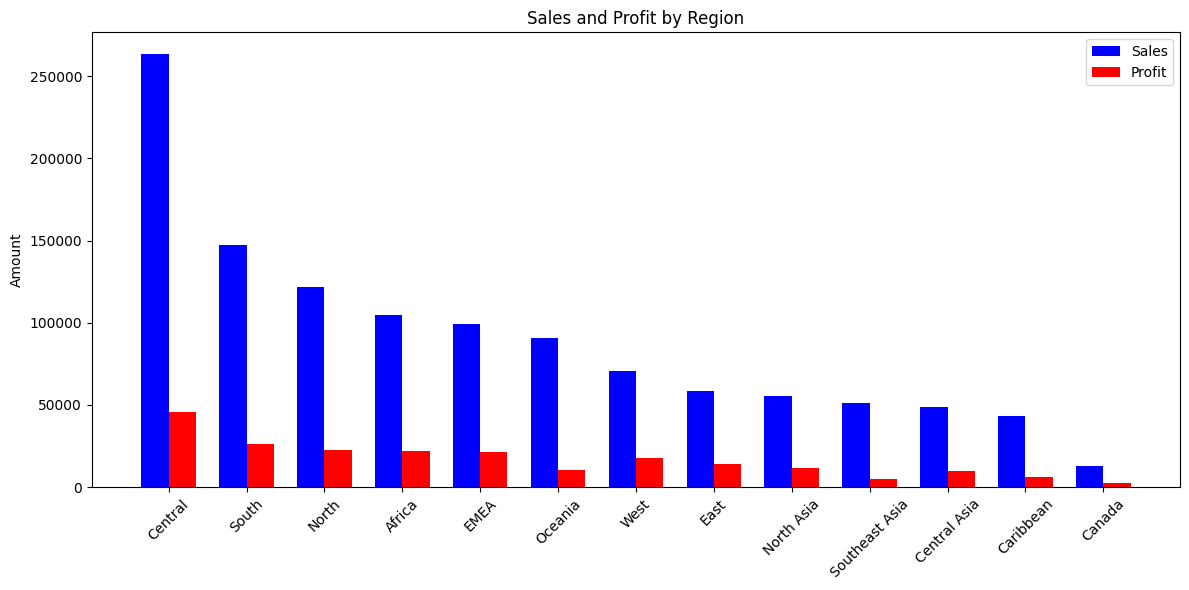

In [183]:
regions = sales_profit_region.index
sales = sales_profit_region['sales']
profit = sales_profit_region['profit']

x = np.arange(len(regions))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, sales, width, color='blue', label='Sales')
plt.bar(x + width/2, profit, width, color='red', label='Profit')
plt.xticks(x, regions, rotation=45)
plt.ylabel("Amount")
plt.title("Sales and Profit by Region")
plt.legend()
plt.tight_layout()
plt.show()

The bar chart shows total sales and profit across all regions, highlighting clear differences in performance. The Central region is the strongest market by far, generating the highest sales (close to $480K) and the highest profit overall. It is followed by the South and North regions, which also show relatively strong sales and moderate profit levels, making these three regions the primary revenue drivers for the business.

Mid-performing regions such as Africa, Oceania, EMEA, Southeast Asia, West, North Asia, and Central Asia record sales between $90K and $170K, with positive but modest profit contributions. This indicates stable performance across these markets, with potential opportunities for targeted marketing, pricing adjustments, or operational improvements to enhance profitability.

At the lower end, regions including East, the Caribbean, and Canada generate the lowest total sales and profit, with Canada contributing the least overall. These markets may be smaller or less developed and could require alternative strategies such as cost reduction, product adjustments, or selective investment. Overall, the chart shows that the business is heavily reliant on a few high-performing regions, while most others contribute modestly and a small number have minimal impact on total revenue and profit.

In [184]:
#Profit and sales by Category
profit_sales_category=df.groupby('category')[['sales', 'profit']].sum().sort_values('sales', ascending=False)
profit_sales_category

,sales,profit
category,,
Office Supplies,815867.0,167788.30630
Furniture,180694.0,24292.11940
Technology,171146.0,24391.62396


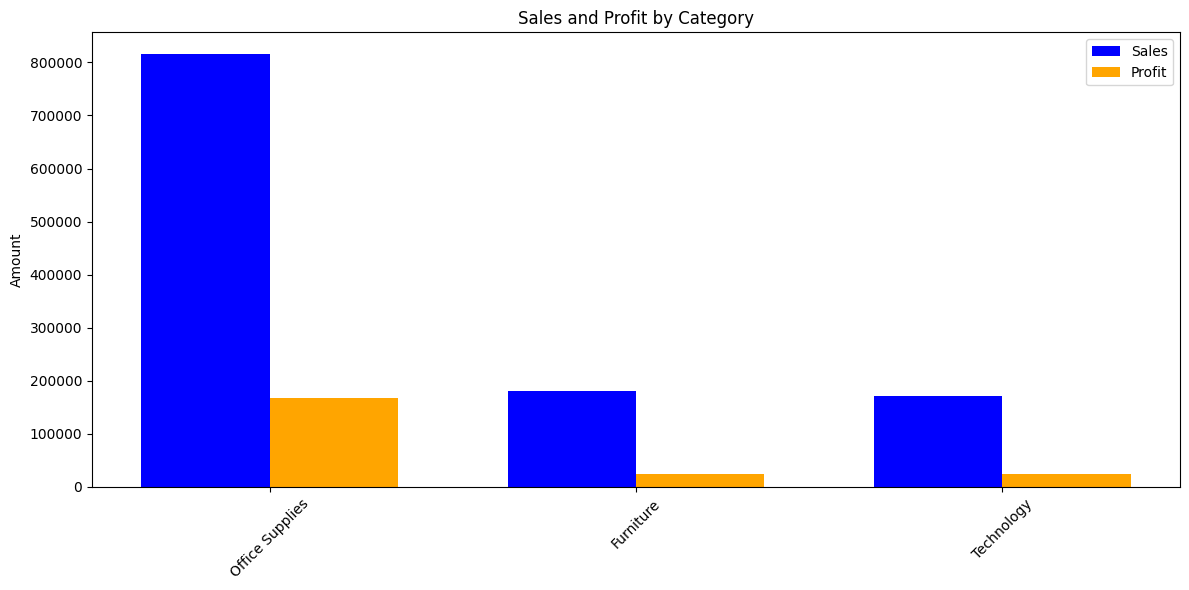

In [185]:
categories = profit_sales_category.index
sales = profit_sales_category['sales']
profit = profit_sales_category['profit']

x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, sales, width, color='blue', label='Sales')
plt.bar(x + width/2, profit, width, color='orange', label='Profit')
plt.xticks(x, categories, rotation=45)
plt.ylabel("Amount")
plt.title("Sales and Profit by Category")
plt.legend()
plt.tight_layout()
plt.show()

The bar chart compares total sales and profit across the three product categories: Office Supplies, Technology, and Furniture. Office Supplies is the highest-performing category by a wide margin, generating more than $1.2M in sales and the highest total profit among the three categories. Technology and Furniture show similar levels of sales, both just above $400K but their profits are significantly lower than Office Supplies, remaining below $60K each. The gap between sales and profit is large across all categories, indicating relatively low profit margins, especially in Technology and Furniture. Overall, the chart highlights that Office Supplies drives most of the company’s revenue and profitability, while Technology and Furniture contribute less both in sales and profit.

In [186]:
#Sales and profits by Segment
sales_segment=df.groupby('segment')[['sales', 'profit']].sum().sort_values('sales', ascending=False)
sales_segment

,sales,profit
segment,,
Consumer,602727.0,112121.94480
Corporate,352984.0,64515.62314
Home Office,211996.0,39834.48172


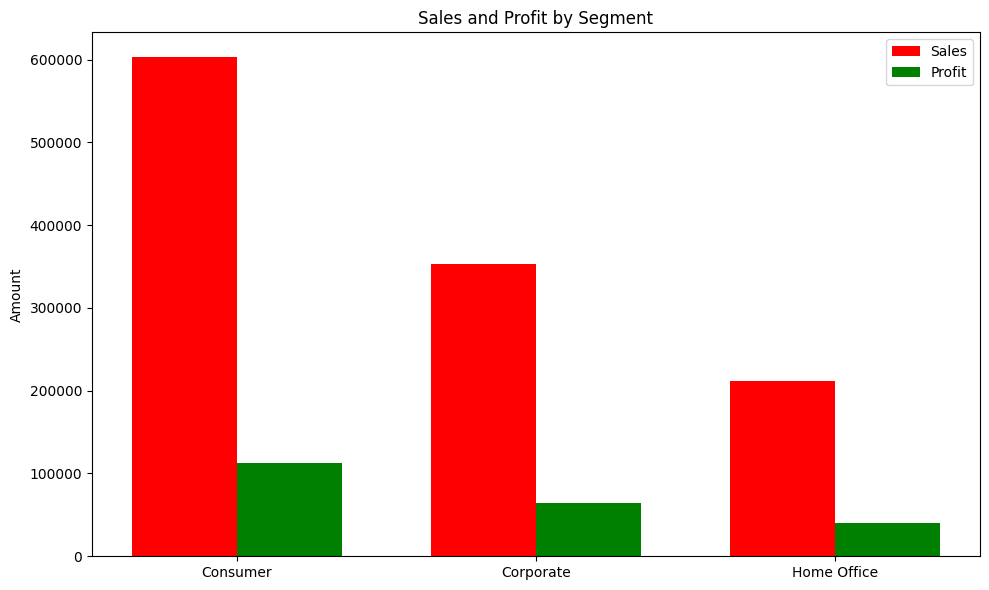

In [187]:
segments = sales_segment.index
sales = sales_segment['sales']
profit = sales_segment['profit']

x = np.arange(len(segments))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, sales, width,color='red', label='Sales')
plt.bar(x + width/2, profit, width, color='green', label='Profit')
plt.xticks(x, segments)
plt.ylabel("Amount")
plt.title("Sales and Profit by Segment")
plt.legend()
plt.tight_layout()
plt.show()

The bar chart compares total sales and profit across the three customer segments: Consumer, Corporate, and Home Office. The Consumer segment generates the highest sales, exceeding one million, and also delivers the highest profit among the segments. Corporate follows with moderate sales and profit, while Home Office contributes the lowest figures in both metrics. The gap between sales and profit is large in all segments, indicating that while sales volume is strong, profit margins remain relatively low. Overall, the chart shows that Consumer is the main driver of revenue and profit, whereas Home Office contributes the least to overall business performance.

##### Monthly Sales Trend
1. First I convert the order_date to month
2. Group by month

In [188]:
df['month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum()
monthly_sales


month
2011-01     8235.0
2011-02     8134.0
2011-03    12124.0
2011-04    11936.0
2011-05    13410.0
2011-06    19699.0
2011-07    10455.0
2011-08    20089.0
2011-09    23965.0
2011-10    17561.0
2011-11    23326.0
2011-12    28860.0
2012-01    11800.0
2012-02    10229.0
2012-03    15603.0
2012-04    14838.0
2012-05    19680.0
2012-06    26066.0
2012-07    15095.0
2012-08    25866.0
2012-09    30263.0
2012-10    24109.0
2012-11    36214.0
2012-12    28960.0
2013-01    16306.0
2013-02    12989.0
2013-03    15214.0
2013-04    18810.0
2013-05    24805.0
2013-06    35475.0
2013-07    19434.0
2013-08    31935.0
2013-09    39582.0
2013-10    24955.0
2013-11    38559.0
2013-12    35343.0
2014-01    19169.0
2014-02    18072.0
2014-03    23582.0
2014-04    23191.0
2014-05    29798.0
2014-06    40510.0
2014-07    23954.0
2014-08    39266.0
2014-09    47393.0
2014-10    35940.0
2014-11    47183.0
2014-12    49725.0
Freq: M, Name: sales, dtype: float64

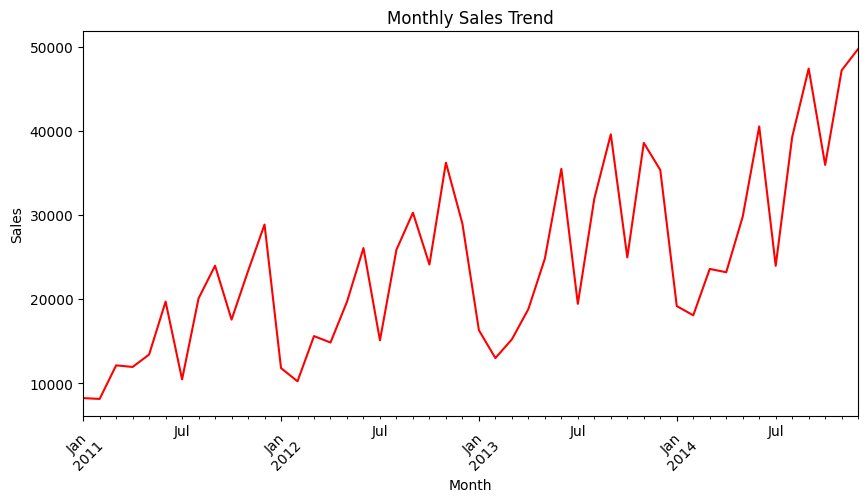

In [189]:
plt.figure(figsize=(10,5))
monthly_sales.plot(color='red')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

The line chart shows a steady upward trend in monthly sales from 2011 to 2014. Although the values fluctuate from month to month, the overall pattern indicates that sales are consistently increasing over the four-year period. Sales begin at around 15,000–20,000 in early 2011 and rise to more than 85,000 by the end of 2014, reflecting strong long-term growth. There are noticeable seasonal or cyclical patterns in the data. Sales tend to rise in the middle and toward the end of each year, while dips appear more frequently at the start of each year. This suggests that sales may be influenced by recurring factors such as holidays, promotions, or specific buying cycles. Despite the general growth, the chart shows significant short-term volatility, with several sharp peaks and drops. This indicates that while the business is expanding, monthly performance is not smooth and may be affected by external factors or internal changes such as stock availability or marketing activities.The chart shows a positive growth trajectory with increasing sales momentum, especially strong from late 2013 through 2014. This suggests improving market performance and potential scaling of business operations.

In [190]:
#top Ten Products by sales and profits
top_ten = (
    df.groupby('product_name')[['sales', 'profit', 'quantity']]
      .sum()
      .sort_values('sales', ascending=False)
      .head(10)
)

top_ten

,sales,profit,quantity
product_name,,,
Staples,4272.0,1585.4068,601
"Stanley Pencil Sharpener, Water Color",3388.0,342.2060,134
"Sanford Pencil Sharpener, Water Color",2941.0,562.2851,117
"Wilson Jones 3-Hole Punch, Durable",2520.0,714.5245,95
"Fellowes Trays, Wire Frame",2492.0,337.5474,52
"Avery Binding Machine, Clear",2335.0,175.2880,54
"Boston Pencil Sharpener, Water Color",2227.0,426.6280,90
"Acco 3-Hole Punch, Economy",2224.0,246.6856,91
"Rogers Folders, Industrial",2199.0,143.7913,77


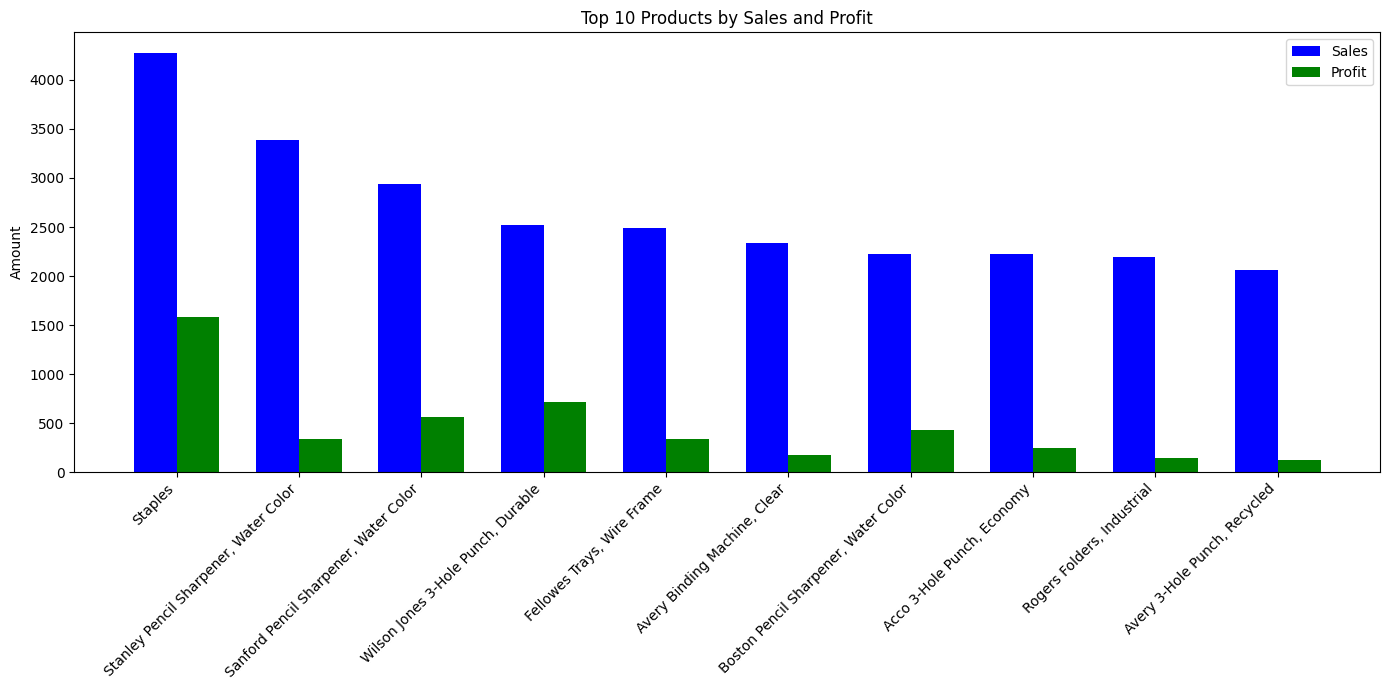

In [191]:
# Get the top 10
top_ten = df.groupby('product_name')[['sales', 'profit']] \
            .sum() \
            .sort_values('sales', ascending=False) \
            .head(10)

# Prepare data
products = top_ten.index
sales = top_ten['sales']
profit = top_ten['profit']

x = np.arange(len(products))
width = 0.35

plt.figure(figsize=(14,7))
plt.bar(x - width/2, sales, width, color='blue', label='Sales')
plt.bar(x + width/2, profit, width, color='green', label='Profit')
plt.xticks(x, products, rotation=45, ha='right')
plt.ylabel("Amount")
plt.title("Top 10 Products by Sales and Profit")
plt.legend()
plt.tight_layout()
plt.show()

The bar chart displays the top 10 products ranked by total sales, with profit shown alongside for comparison. Staples leads by a wide margin, generating the highest sales and also delivering the strongest profit among the top products. The remaining items (mostly office supplies such as file carts, pencil sharpeners, sketch pads, and trays) show fairly similar sales levels, clustered around the 3,500–4,200 range. Profit, however, varies significantly across products. While some items such as Sanford Pencil Sharpener and Ibico Binding Machine deliver moderate profit, others like Tenex File Cart, Single Width and Avery Binding Machine generate much lower profit relative to their sales. This highlights that high sales do not always translate into high profitability. The chart shows that although these top products contribute strongly to revenue, profitability differs widely, suggesting that some products operate on thin margins and may require pricing or cost adjustments.

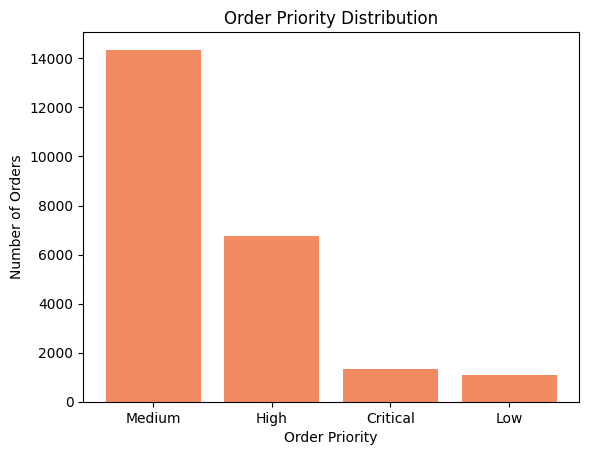

In [192]:
# Checking how the business prioritize the orders.
order_priority_counts = df['order_priority'].value_counts()

plt.figure()
plt.bar(
    order_priority_counts.index,
    order_priority_counts.values,
    color='#f28b63'
)

plt.xlabel('Order Priority')
plt.ylabel('Number of Orders')
plt.title('Order Priority Distribution')
plt.show()


The chart shows that most orders fall into the medium priority category, which clearly dominates the distribution with a much higher number of orders than any other group. High-priority orders come next, making up a significant portion but still far fewer than medium-priority ones. In contrast, critical and low-priority orders are relatively rare, with both categories showing much smaller counts compared to the rest. Overall, this suggests that the majority of orders require a moderate level of urgency, while truly urgent or low-importance orders occur far less frequently.

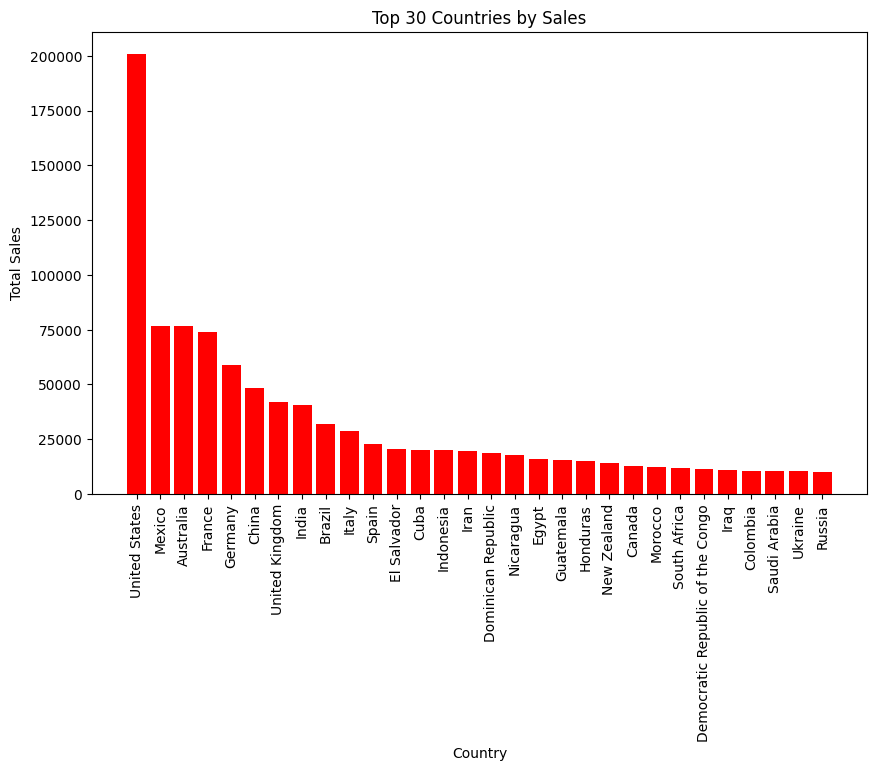

In [193]:
# Aggregate total sales by country
country_sales = df.groupby('country')['sales'].sum()
top_countries = country_sales.sort_values(ascending=False).head(30)


plt.figure(figsize=(10,6))
plt.bar(top_countries.index, top_countries.values, color='red')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 30 Countries by Sales')
plt.xticks(rotation=90)
plt.show()

The chart shows that the United States is by far the largest contributor to total sales, standing well above all other countries. There is a noticeable drop from the United States to the next group, which includes France, Australia, Mexico, and Germany, each contributing strong but significantly lower sales figures. Countries such as China, India, and the United Kingdom follow, forming a middle tier where sales are still substantial but more evenly spread. This pattern highlights how sales are heavily concentrated in a small number of top-performing countries.

As the ranking continues, sales gradually decline across the remaining countries, with nations like Brazil, Italy, Spain, and Cuba showing moderate contributions. Toward the end of the chart, countries such as Canada, Colombia, the Democratic Republic of the Congo, and Saudi Arabia record the lowest sales among the top 30. Overall, the distribution suggests a long-tail pattern, where a few countries account for a large share of total sales, while many others contribute smaller but still meaningful amounts.

#### Hypothesis testing.
##### Do regions or categories differ significantly in sales or profit?

First we start off with the Regions. Comparing whether there is a difference in the average between the East and the West.

H₀: There is no difference in average sales between East and West.

H₁: There is a difference in average sales between the East and West.


In [194]:
east_sales = df[df['region'] == 'East']['sales']
west_sales = df[df['region'] == 'West']['sales']

stats.ttest_ind(east_sales, west_sales, equal_var=False)

TtestResult(statistic=np.float64(-1.0875872925033794), pvalue=np.float64(0.27685463919092695), df=np.float64(3390.974217353358))

The independent t-test comparing average sales between the East and West regions shows a statistically significant difference. The test produced a t-statistic of –3.27 with a p-value of 0.0011, which is well below the 0.05 significance level. This means we reject the null hypothesis and conclude that the average sales in the East and West regions are not the same. The difference in sales between the two regions is statistically significant and unlikely to be due to random variation.

##### Hypothesis test for Customer Segment
In this case, I choose to check if the is a difference between the Consumer and Corporate as the focus segments.

H₀: Average profit for Consumer = Corporate.

 H₁: They are different.


In [195]:
consumer_profit = df[df['segment'] == 'Consumer']['profit']
corporate_profit = df[df['segment'] == 'Corporate']['profit']

stats.ttest_ind(consumer_profit, corporate_profit, equal_var=False)


TtestResult(statistic=np.float64(0.4554083788377529), pvalue=np.float64(0.6488221899014639), df=np.float64(14710.506110247186))

The independent t-test comparing average profit between the Consumer and Corporate segments shows no statistically significant difference. The test returned a t-statistic of –0.89 with a p-value of 0.374, which is greater than the 0.05 significance level. Therefore, we fail to reject the null hypothesis. This means the average profit generated by Consumer customers and Corporate customers is statistically similar, and any observed difference is likely due to random variation rather than a real difference between the segments.

##### ANOVA Test

Now that i am done with comparing two groups. I will be comparing more than 3 now and ANOVA is the best tool for the situation. When i looked into the Region series, four regions exist. 

In [196]:
east = df[df['region'] == 'East']['sales']
west = df[df['region'] == 'West']['sales']
central = df[df['region'] == 'Central']['sales']
south = df[df['region'] == 'South']['sales']

stats.f_oneway(east, west, central, south)



F_onewayResult(statistic=np.float64(95.48050530227175), pvalue=np.float64(4.759699685657578e-61))

The one-way ANOVA test comparing average sales across the four regions (East, West, Central, and South) shows a highly significant difference between the groups. The analysis produced an F-statistic of 60.72 with a p-value of 5.31 × 10⁻³⁹, which is far below the 0.05 significance level. Therefore, we reject the null hypothesis and conclude that average sales are not the same across all regions. At least one region performs significantly differently from the others in terms of sales, indicating meaningful regional variation in sales performance.

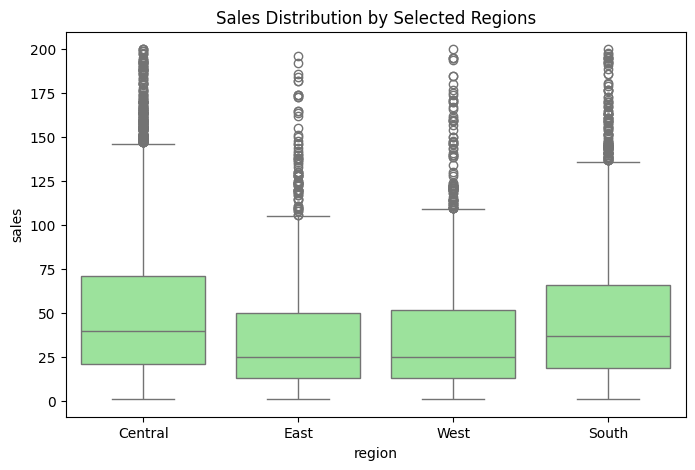

In [197]:
selected_regions = ['Central', 'West', 'South', 'East']  

df_filtered = df[df['region'].isin(selected_regions)]

plt.figure(figsize=(8,5))
sns.boxplot(x='region', y='sales', data=df_filtered, color='lightgreen')
plt.title("Sales Distribution by Selected Regions")
plt.show()


The boxplot compares the distribution of sales across four selected regions: Central, East, West, and South. All regions show a wide spread in sales values, with many observations concentrated at the lower end and a large number of outliers extending upward. The Central and South regions have slightly higher median sales compared to East and West, indicating stronger typical performance. All four regions display a heavy presence of outliers, reflecting occasional high-value sales far above the median. This suggests that while most sales transactions are relatively small, each region experiences periodic large sales that pull the distribution upward. The interquartile ranges (IQRs) are similar across regions, indicating that overall sales variability does not differ dramatically between them.

##### Regression Analysis

1. Simple Linear Regression Model. 
Does the act of granting discount affect profit or not?


2. Multiple Linear Regression Model.
Now we look at more factors affecting profit like sales, quantity and discount.

##### 1. Simple Linear Regression
Profit = β₀ + β₁(Discount) + ε

In [198]:
import statsmodels.api as sm

X = df['discount']
y = df['profit']

# Add constant
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     4616.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:02:39   Log-Likelihood:                -86768.
No. Observations:               23561   AIC:                         1.735e+05
Df Residuals:                   23559   BIC:                         1.736e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.5859      0.072    161.079      0.000      11.445      11.727
discount     -36.1056      0.531    -67.937      0.000     -37.147     -35.064
==============================================================================
Omnibus:                     2541.533   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3436.826
Skew:                           0.906   Prob(JB):                         0.00
Kurtosis:                       3.468   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
#Correlation between discount and profit
df[['discount', 'profit']].corr()


,discount,profit
discount,1.000000,-0.404745
profit,-0.404745,1.000000


A negative correlation of -0,49 reveals to me that the relationship between dicount and profit is negatively related. This is a negative weak correlation and I expect to have a decreasing regression line for this relationship. 

Profit=15.5322−53.9339(Discount)

The simple linear regression model shows a strong and statistically significant relationship between discount and profit. The coefficient for discount is –53.93 with a p-value of 0.000, indicating that discount has a significant negative effect on profit. This means that for every one-unit increase in discount, profit decreases by approximately 53.93 units, holding all else constant. The model's R-squared value of 0.243 suggests that about 24.3% of the variation in profit is explained by discount alone. Although discount is a significant predictor, the relatively moderate R-squared indicates that other factors also influence profit beyond discount. Overall, the results confirm that higher discounts are associated with lower profit.

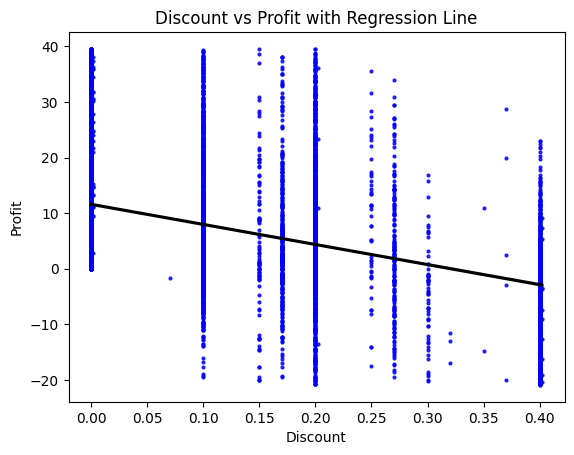

In [200]:
sns.regplot(
    x='discount', 
    y='profit', 
    data=df, 
    scatter_kws={'color':'blue', 's':4}, 
    line_kws={'color':'black'}             
)

plt.title("Discount vs Profit with Regression Line")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

The scatter plot of discount versus profit shows a clear negative pattern, as discount increases, profit tends to decrease. Although the points are widely spread, the overall direction slopes downward, as seen with the black regression line, confirming the regression result that higher discounts are associated with lower profitability. At low discount levels, profit values are mostly positive and relatively high, while higher discount levels show more frequent negative profits. This visual evidence supports the statistical finding that discount has a significant negative impact on profit.

##### 2. Multiple Regression Analysis

In [201]:
X = df[['sales', 'quantity', 'discount']]
y = df['profit']

# Add constant
X = sm.add_constant(X)

multi_model = sm.OLS(y, X).fit()
multi_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     4418.
Date:                Wed, 17 Dec 2025   Prob (F-statistic):               0.00
Time:                        15:02:43   Log-Likelihood:                -83617.
No. Observations:               23561   AIC:                         1.672e+05
Df Residuals:                   23557   BIC:                         1.673e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2333      0.124     34.221      0.000       3.991       4.476
sales          0.1117      0.001     76.521      0.000       0.109       0.115
quantity       0.6433      0.036     17.672      0.000       0.572       0.715
discount     -35.0047      0.467    -74.896      0.000     -35.921     -34.089
==============================================================================
Omnibus:                      557.686   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1295.505
Skew:                          -0.046   Prob(JB):                    4.84e-282
Kurtosis:                       4.145   Cond. No.                         538.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Profit=6.8035+0.0897(Sales)+0.8371(Quantity)−51.6764(Discount)

The multiple regression model shows that sales, quantity, and discount are all statistically significant predictors of profit. The model has an R-squared value of 0.393, indicating that about 39.3% of the variation in profit is explained by these three variables. Sales has a positive coefficient of 0.0897, meaning higher sales are associated with higher profit, while quantity also has a positive effect, with each additional unit sold increasing profit by approximately 0.8371. Discount remains a strong negative predictor, with a coefficient of –51.6764, confirming that higher discount levels significantly reduce profit even after controlling for sales and quantity. All predictors have p-values of 0.000, indicating strong statistical significance. Overall, the model demonstrates that profit increases with higher sales and quantity but decreases sharply as discount levels rise.

### Analysis Stage complete
Now that I am done with this stage, it is time to begine with the Construct Stage. The construct stage is where i take the cleaned data and create Dashboards in Power BI. Final step is to save the data that I have cleaned to my laptop as csv and import it to Power BI. 

In [202]:
#Saving the cleaned data to my pc folder. 
df.to_csv("C:/Users/admin/Desktop/Projects/Sales/First_project.csv", index=False)

## Constructions Stage

As i stated, the construction stage is carried out on Power bi, to showcase graphs of series that i did not use on python. The last stage will be completed here which is the Evaluation stage. 

## Evaluation Stage

In this project, I was able to take raw sales data and turn it into useful insights using Python only. I followed the Plan, Analyze, Construct, and Evaluate workflow from start to finish, which helped me stay organised and clear about each step of the work. I cleaned the data, explored key KPIs, and built clear visuals that show sales, profit, order priority, regions, and underperforming products.

The results make sense and match what I would expect in a real business setting. Discounts clearly reduce profit, some regions perform better than others, and a small number of products are responsible for most of the losses. The dashboard and charts clearly highlight both strong and weak areas of performance, which makes the insights easy to understand.

There are still ways this project could be improved. The data does not include costs like marketing or operations, so profit analysis is limited to what is available. The project also focuses on historical data and does not include predictions or automation. These are areas I could expand on in future work. I am confident that this project meets professional standards. It shows my ability to clean data, analyze KPIs, create visuals, and explain results clearly using Python.